# 1.a) BUSINESS PROBLEM 

Cancer is a major health concern worldwide, and early detection significantly improves treatment outcomes and survival rates. However, diagnosing cancer often requires expensive tests, biopsies, and extensive medical evaluations. A predictive model based on readily available patient information—such as demographics, medical history, and lifestyle habits—can help assess cancer risk early, allowing for timely medical interventions.

The goal of this project is to build a **Machine Learning (ML) model** that predicts whether a patient is likely to have cancer **(Cancer_Present: 0 or 1)** based on factors like tumor size, tumor grade, symptoms severity, family history, smoking history, alcohol consumption, and exercise frequency.


# 1.b) DATA UNDERSTANDING 

### Importing Libraries

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the Data

In [137]:
df = pd.read_csv(r"C:\Users\bsrav\INNOMATICS\INNOMATICS_NOTEBOOK\MACHINE LEARNING\Datasets\Datasets\cancer_prediction_data (2).csv")

In [138]:
df.head()

,Age,Gender,Tumor_Size,Tumor_Grade,Symptoms_Severity,Family_History,Smoking_History,Alcohol_Consumption,Exercise_Frequency,Cancer_Present
0,62.0,Male,9.763242,High,Mild,Yes,Former Smoker,Moderate,NaN,0
1,33.0,Male,7.946532,NaN,Moderate,Yes,Current Smoker,NaN,Regularly,1
2,33.0,Female,NaN,High,Moderate,No,Current Smoker,High,Rarely,1
3,58.0,Female,NaN,Low,Mild,NaN,Current Smoker,NaN,Rarely,1
4,NaN,Female,1.384231,Medium,Mild,No,Former Smoker,Moderate,Occasionally,1


### DATA DESCRIPTION 

## **Features**

**Age:** Integer values representing the patient's age, ranging from 20 to 80.

**Gender:** Categorical values representing gender, with possible values as "Male" or "Female."

**Tumor_Size:** Continuous values representing the size of the tumor in centimeters. Some values may be missing.

**Tumor_Grade:** Categorical values indicating the grade of the tumor, where "Low," "Medium," and "High" represent different levels of severity. Some values may be missing.

**Symptoms_Severity:** Categorical values indicating the severity of symptoms, with possible values as "Mild," "Moderate," or "Severe."

**Family_History:** Binary values indicating whether the patient has a family history of cancer, where "Yes" means a history of cancer and "No" means none. Some values may be missing.

**Smoking_History:** Categorical values representing the patient's smoking history, with possible values as "Current Smoker," "Former Smoker," or "None."

**Alcohol_Consumption:** Categorical values representing alcohol consumption levels, with possible values as "None," "Low," "Moderate," or "High." Some values may be missing.

**Exercise_Frequency:** Categorical values indicating how often the patient engages in exercise, with possible values as "Rarely," "Occasionally," "Regularly," or missing values.

#### **Target Variable**

**Cancer_Present:** Binary values indicating cancer diagnosis, where 0 means No Cancer and 1 means Cancer.

# 2. DATA PREPARATION

### 2.a) DATA CLEANING

In [139]:
df.columns

Index(['Age', 'Gender', 'Tumor_Size', 'Tumor_Grade', 'Symptoms_Severity',
       'Family_History', 'Smoking_History', 'Alcohol_Consumption',
       'Exercise_Frequency', 'Cancer_Present'],
      dtype='object')

In [140]:
df.isna().sum() # Before filling the missing values 

Age                    189
Gender                 206
Tumor_Size             171
Tumor_Grade            193
Symptoms_Severity      185
Family_History         208
Smoking_History        179
Alcohol_Consumption    679
Exercise_Frequency     195
Cancer_Present           0
dtype: int64

In [141]:
df.duplicated().sum()

0

In [142]:
numeric = ["Age","Tumor_Size"]
ordinal = ["Tumor_Grade","Symptoms_Severity","Alcohol_Consumption","Exercise_Frequency"]
nominal = ["Gender","Smoking_History","Family_History"]

**Handling Missing Values**

Since some features have missing values, we need to impute them appropriately.

**Numerical Features (Age, Tumor_Size)** → Fill with **median** (handles skewness).

**Ordinal Features (Tumor_Grade, Symptoms_Severity, Alcohol_Consumption, Exercise_Frequency)** → Fill with **mode** (most frequent category).

**Nominal Features** (Gender, Smoking_History, Family_History) → Fill with:

**Gender** → **Mode** (most frequent category).

**Smoking_History** → **"None"** (assuming missing means no smoking history).

**Family_History** → **"No"** (assuming missing means no family history).

In [143]:
# 1. Fill missing values in numerical columns with median
df[numeric] = df[numeric].apply(lambda x: x.fillna(x.median()))

In [144]:
# 2. Fill missing values in ordinal columns with mode
df[ordinal] = df[ordinal].apply(lambda x: x.fillna(x.mode()[0]))

In [145]:
# 3. Fill missing values in nominal columns
df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])
df["Smoking_History"] = df["Smoking_History"].fillna("None")
df["Family_History"] = df["Family_History"].fillna("No")

In [146]:
df.isna().sum() # After filling the missing values

Age                    0
Gender                 0
Tumor_Size             0
Tumor_Grade            0
Symptoms_Severity      0
Family_History         0
Smoking_History        0
Alcohol_Consumption    0
Exercise_Frequency     0
Cancer_Present         0
dtype: int64

In [147]:
df.shape

(2000, 10)

In [148]:
df.describe()

,Age,Tumor_Size,Cancer_Present
count,2000.000000,2000.000000,2000.000000
mean,49.242500,5.129142,0.491500
std,16.520325,2.659758,0.500053
min,20.000000,0.507471,0.000000
25%,36.000000,2.907228,0.000000
50%,49.000000,5.079521,0.000000
75%,63.000000,7.354554,1.000000
max,79.000000,9.998166,1.000000


In [189]:
# Replace 'Never' with the most common category from training
x_test["Smoking_History"] = x_test["Smoking_History"].replace("Never", "No")

### 2.b) Exploratory Data Analysis(EDA)

## Cancer Presence Analysis

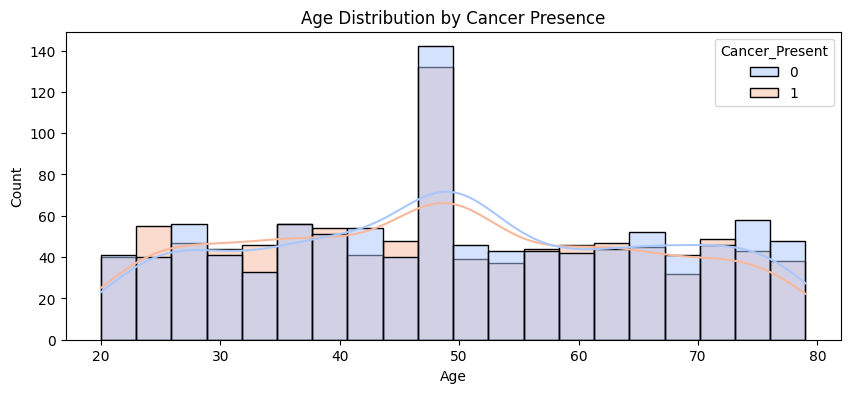

In [149]:
## Age vs Cancer Presence
plt.figure(figsize=(10, 4))

sns.histplot(data=df, x="Age", hue="Cancer_Present", kde=True, palette="coolwarm", bins=20)
plt.title("Age Distribution by Cancer Presence")
plt.show()

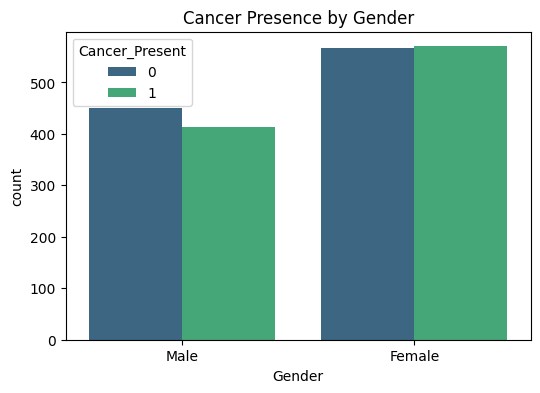

In [150]:
## Gender vs Cancer Presence
plt.figure(figsize=(6, 4))
sns.countplot(x="Gender", hue="Cancer_Present", data=df, palette="viridis")
plt.title("Cancer Presence by Gender")
plt.show()

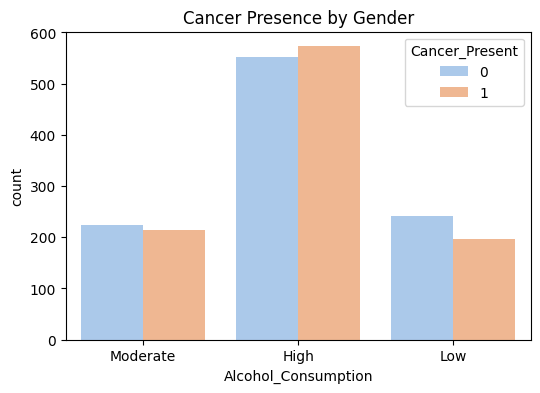

In [151]:
## Gender vs Cancer Presence
plt.figure(figsize=(6, 4))
sns.countplot(x="Alcohol_Consumption", hue="Cancer_Present", data=df, palette="pastel")
plt.title("Cancer Presence by Gender")
plt.show()

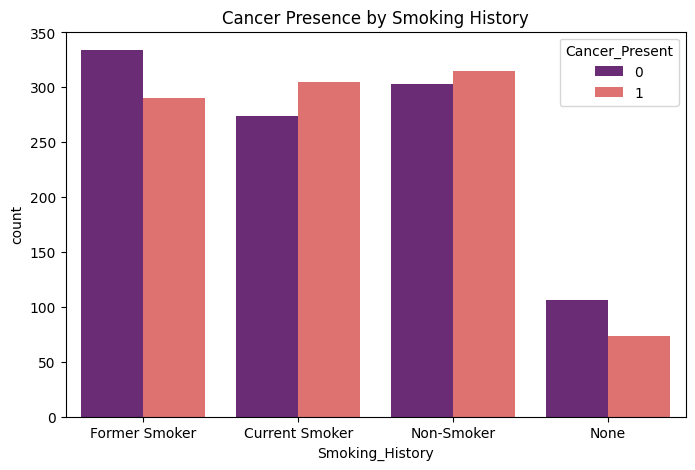

In [152]:
## Smoking History & Cancer Presence
plt.figure(figsize=(8, 5))
sns.countplot(x="Smoking_History", hue="Cancer_Present", data=df, palette="magma")
plt.title("Cancer Presence by Smoking History")
plt.show()

In [153]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [190]:
numeric_preprocess = Pipeline([("Mean Imputation",SimpleImputer(strategy='mean')),
                               ("Scaling",StandardScaler())]) # List of tuples
numeric_preprocess

Pipeline(steps=[('Mean Imputation', SimpleImputer()),
                ('Scaling', StandardScaler())])

In [191]:
ordinal_preprocess =  Pipeline([("Mode Imputation",SimpleImputer(strategy='most_frequent')),
                               ("Scaling",OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))])

ordinal_preprocess

Pipeline(steps=[('Mode Imputation', SimpleImputer(strategy='most_frequent')),
                ('Scaling',
                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                unknown_value=-1))])

In [192]:
nominal_preprocess = Pipeline([("Mode Imputation",SimpleImputer(strategy='most_frequent')),
                               ("Scaling",OneHotEncoder(handle_unknown='ignore',sparse_output=False))])
nominal_preprocess

Pipeline(steps=[('Mode Imputation', SimpleImputer(strategy='most_frequent')),
                ('Scaling',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [193]:
preprocess  = ColumnTransformer([('Numerical transfromation',numeric_preprocess,numeric),
                                ('Ordinal Transformation',ordinal_preprocess,ordinal),
                                ('Nominal Transformation',nominal_preprocess,nominal)],remainder="passthrough")
preprocess

ColumnTransformer(remainder='passthrough',
                  transformers=[('Numerical transfromation',
                                 Pipeline(steps=[('Mean Imputation',
                                                  SimpleImputer()),
                                                 ('Scaling',
                                                  StandardScaler())]),
                                 ['Age', 'Tumor_Size']),
                                ('Ordinal Transformation',
                                 Pipeline(steps=[('Mode Imputation',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('Scaling',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1))]),
                                 ['Tumor_Grade', 'Symptoms_Severity',
                                  'Alcohol_Consumption',
                                  'Exercise_Frequency']),
                                ('Nominal Transformation',
                                 Pipeline(steps=[('Mode Imputation',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('Scaling',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Gender', 'Smoking_History',
                                  'Family_History'])])

# 3.MODEL BUILDING

In [194]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [195]:
x = df.drop("Cancer_Present",axis =1)
y = df["Cancer_Present"]

In [196]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=23)

### Desision Tree

In [197]:
dt = Pipeline([("Data Preprocessing",preprocess),
              ("Algorithm",DecisionTreeClassifier())])

In [198]:
dt.fit(x_train,y_train).score(x_test,y_test)

0.4825

### Logistic Regression 

In [199]:
log = Pipeline([("Data Preprocessing",preprocess),
              ("Algorithm",LogisticRegression())])

In [200]:
log.fit(x_train,y_train).score(x_test,y_test)

0.5425

### K-Nearest Neighbours 

In [201]:
knn = dt = Pipeline([("Data Preprocessing",preprocess),
              ("Algorithm",KNeighborsClassifier())])

In [202]:
knn.fit(x_train,y_train).score(x_test,y_test)

0.445

### Support Vector Classifier

In [203]:
svc =  Pipeline([("Data Preprocessing",preprocess),
              ("Algorithm",SVC())])

In [204]:
svc.fit(x_train,y_train).score(x_test,y_test)

0.51

### Xgboot

In [205]:
xg = svc =  Pipeline([("Data Preprocessing",preprocess),
              ("Algorithm",XGBClassifier())])

In [206]:
xg.fit(x_train,y_train).score(x_test,y_test)

0.515

### Random Forest

In [207]:
rf = svc =  Pipeline([("Data Preprocessing",preprocess),
              ("Algorithm",RandomForestClassifier())])

In [208]:
rf.fit(x_train,y_train).score(x_test,y_test)

0.475

In [209]:
## MODEL DEPLOYMENT

In [210]:
log.fit(x,y)

Pipeline(steps=[('Data Preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Numerical transfromation',
                                                  Pipeline(steps=[('Mean '
                                                                   'Imputation',
                                                                   SimpleImputer()),
                                                                  ('Scaling',
                                                                   StandardScaler())]),
                                                  ['Age', 'Tumor_Size']),
                                                 ('Ordinal Transformation',
                                                  Pipeline(steps=[('Mode '
                                                                   'Imputation',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('Scaling',
                                                                   OrdinalEnco...
                                                                                  unknown_value=-1))]),
                                                  ['Tumor_Grade',
                                                   'Symptoms_Severity',
                                                   'Alcohol_Consumption',
                                                   'Exercise_Frequency']),
                                                 ('Nominal Transformation',
                                                  Pipeline(steps=[('Mode '
                                                                   'Imputation',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('Scaling',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Gender', 'Smoking_History',
                                                   'Family_History'])])),
                ('Algorithm', LogisticRegression())])

In [211]:
import pickle

In [212]:
# Save the entire pipeline
with open("cancer_pipeline.pkl", "wb") as f:
    pickle.dump(log, f)

print("✅ New pipeline model saved successfully!")


✅ New pipeline model saved successfully!


In [213]:
# Load pipeline model
with open("cancer_pipeline.pkl", "rb") as f:
    loaded_pipeline = pickle.load(f)

print("Pipeline model loaded successfully!")


Pipeline model loaded successfully!


In [214]:
import os
os.getcwd()

'C:\\Users\\bsrav\\INNOMATICS\\INNOMATICS_NOTEBOOK\\MACHINE LEARNING\\ML CLASS'

In [215]:
# Ensure input is a DataFrame with column names
sample_input = pd.DataFrame([x_test.iloc[0]], columns=x_test.columns)

# Predict using the loaded pipeline
prediction = loaded_pipeline.predict(sample_input)

print("Prediction:", "Cancer" if prediction[0] == 1 else "No Cancer")

Prediction: No Cancer


In [216]:
df.columns

Index(['Age', 'Gender', 'Tumor_Size', 'Tumor_Grade', 'Symptoms_Severity',
       'Family_History', 'Smoking_History', 'Alcohol_Consumption',
       'Exercise_Frequency', 'Cancer_Present'],
      dtype='object')